### Task: Perform feature engineering on a dataset to prepare it for machine learning modeling.

#### Select Dataset - Titanic

In [7]:
from sklearn import datasets, preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [8]:
diabetes = sns.load_dataset('titanic')
display(diabetes.head())


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Data Cleaning:

Handle missing values by imputing them with appropriate statistics (mean, median, mode) or by removing the affected rows/columns.
Identify and address outliers that might skew the model's performance.

In [9]:


df_dropped_col = diabetes.copy()
print(len(df_dropped_col))
print(df_dropped_col.isnull().sum())


891
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
df_median = diabetes.copy()
print(len(df_median))

df_median = df_median.fillna(df_median.median())

891


TypeError: 'Categorical' with dtype category does not support reduction 'median'

In [43]:
print(diabetes_df.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


#### Feature Creation:

Generate new features that might enhance the model's predictive power. For example, creating an 'Age_Group' feature from the 'Age' column or extracting 'Title' from a 'Name' column.

In [72]:
df_median["wine_quality"] = df_median["alcohol"].apply(lambda value: 'low' if value < 12 else ('medium' if value < 13.5 else 'high'))
df_dropped_col["wine_quality"] = df_dropped_col["alcohol"].apply(lambda value: 'bad' if value < 12.5 else "good")
print(df_dropped_col)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

#### One Hot Encodng or Label Encoding

In [78]:
#One hot encodng
print(df_median)
columnTransformer = ColumnTransformer([("Name", OneHotEncoder(sparse_output=False), [-1])], remainder='passthrough') #Ott az -1 azt jelenti, hogy melyik oszlopot akarjuk mókolni
x2 = columnTransformer.fit_transform(df_median)
df = pd.DataFrame(x2)
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [79]:
#Label Encode
lEncoder = LabelEncoder()
y = df_dropped_col["wine_quality"]

y = lEncoder.fit_transform(y)
df_dropped_col["wine_quality"] = y
print(df_dropped_col)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

#### Feature Transformation:

For numerical features, apply scaling techniques such as standardization or normalization to ensure they contribute equally to the model.
For categorical features, use encoding methods like one-hot encoding or label encoding to convert them into numerical formats.

           0         1         2         3         4         5         6   \
0    1.456986 -0.345683 -1.158493  1.521077 -0.562250  0.232053 -1.169593   
1   -0.686349 -0.345683  0.863191  0.245290 -0.499413 -0.827996 -2.490847   
2   -0.686349 -0.345683  0.863191  0.195745  0.021231  1.109334 -0.268738   
3    1.456986 -0.345683 -1.158493  1.694485 -0.346811  0.487926 -0.809251   
4   -0.686349 -0.345683  0.863191  0.294835  0.227694  1.840403  0.451946   
..        ...       ...       ...       ...       ...       ...       ...   
173  1.456986 -0.345683 -1.158493  0.876990  2.974543  0.305159  0.301803   
174 -0.686349 -0.345683  0.863191  0.493016  1.412609  0.414820  1.052516   
175 -0.686349 -0.345683  0.863191  0.331994  1.744744 -0.389355  0.151661   
176 -0.686349 -0.345683  0.863191  0.208131  0.227694  0.012732  0.151661   
177  1.456986 -0.345683 -1.158493  1.397214  1.583165  1.365208  1.502943   

           7         8         9         10        11        12        13  

<Axes: >

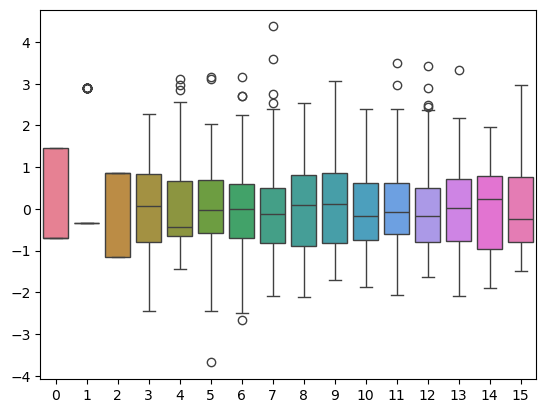

In [82]:
scaler_stand = preprocessing.StandardScaler()

scaler_stand.fit(df)


standardized_df = pd.DataFrame(scaler_stand.transform(df), columns=df.columns)
print(standardized_df)
sns.boxplot(data=standardized_df.iloc[:, :-1])

In [84]:
scaler_norm = preprocessing.MinMaxScaler()

print(df_dropped_col)

normalized_df = pd.DataFrame(scaler_norm.fit_transform(df_dropped_col), columns=df_dropped_col.columns)
print(normalized_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

#### Feature Selection

Evaluate the importance of features using techniques like correlation analysis or feature importance from models to select the most relevant ones.

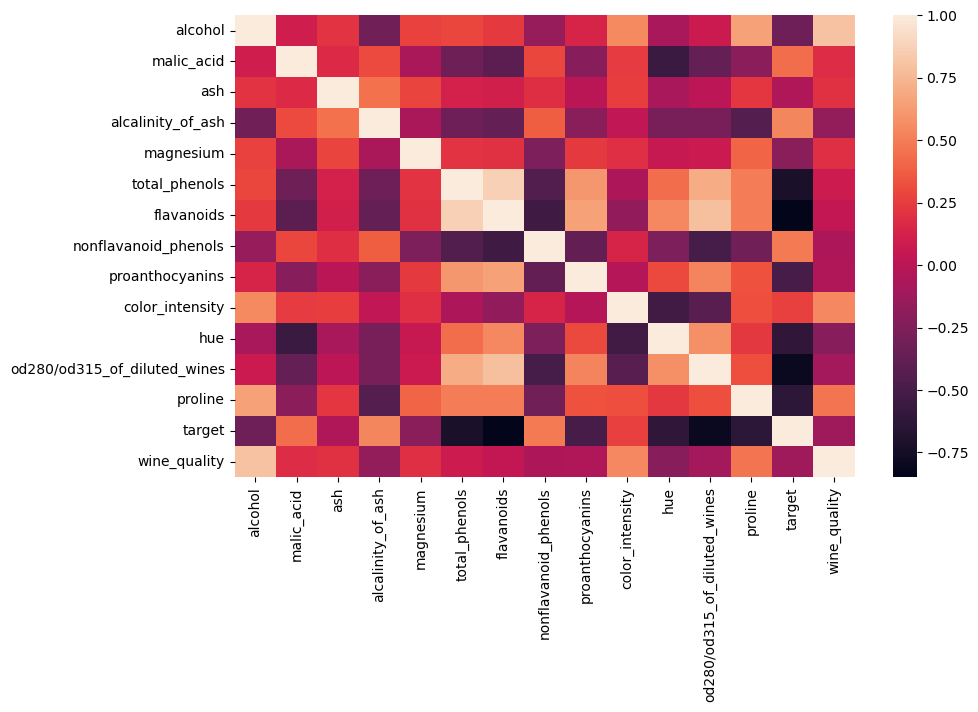

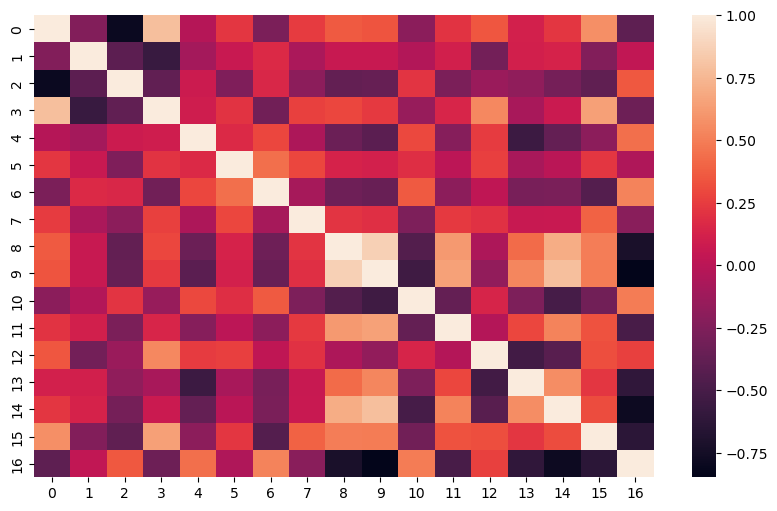

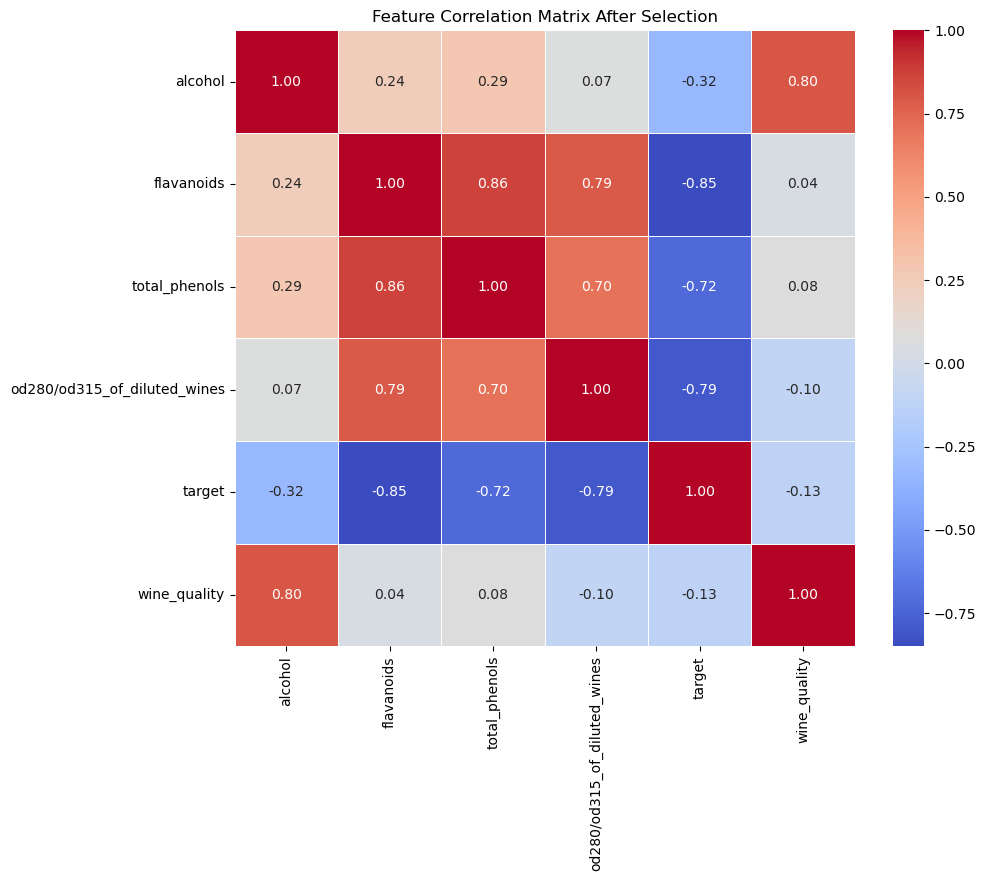

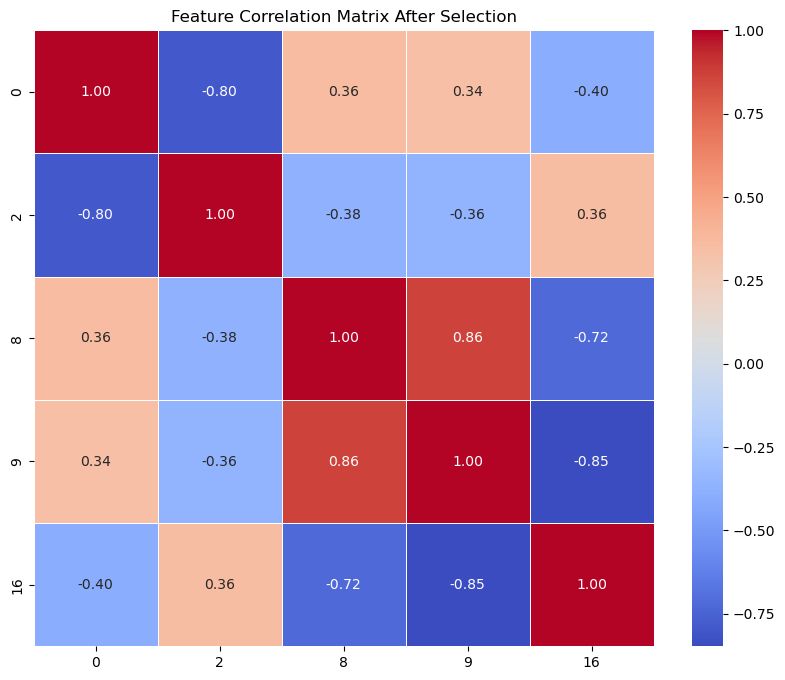

In [97]:
df_corr_minmax = normalized_df.corr()
df_corr_standard = standardized_df.corr()


def correlation_feature_select(dfdata, threshold = 0.1):


    corr_matrix = dfdata.corr()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

    to_keep_upper = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    to_keep_lower = [column for column in lower.columns if any(lower[column].abs() > threshold)]

    myset = set(to_keep_upper)
    myset.update(to_keep_lower)
    
    keep_col = list(myset)
    # Drop correlated features
    return dfdata[keep_col]



plt.figure(figsize=(10,6))
sns.heatmap(df_corr_minmax)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr_standard)
plt.show()



df_selected_minmax = correlation_feature_select(normalized_df, 0.79)
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected_minmax.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix After Selection")
plt.show()



df_selected_standard = correlation_feature_select(standardized_df, 0.79)
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected_standard.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix After Selection")
plt.show()

